In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_curve
)

from sklearn.model_selection import cross_val_score

In [2]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').squeeze()
y_test = pd.read_csv('../data/y_test.csv').squeeze()


In [4]:
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')  # handles imbalance
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]


In [5]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]


In [6]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"../results/plots/{model_name}_confusion_matrix.png")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_proba):.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig(f"../results/plots/{model_name}_roc.png")
    plt.show()


=== LogisticRegression Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.78      0.86      7985
           1       0.28      0.64      0.39      1058

    accuracy                           0.77      9043
   macro avg       0.61      0.71      0.62      9043
weighted avg       0.86      0.77      0.80      9043



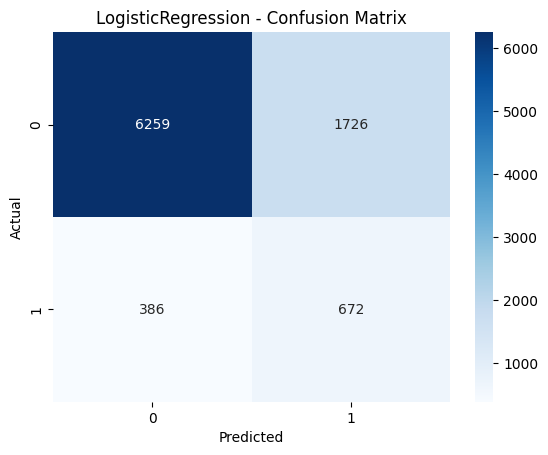

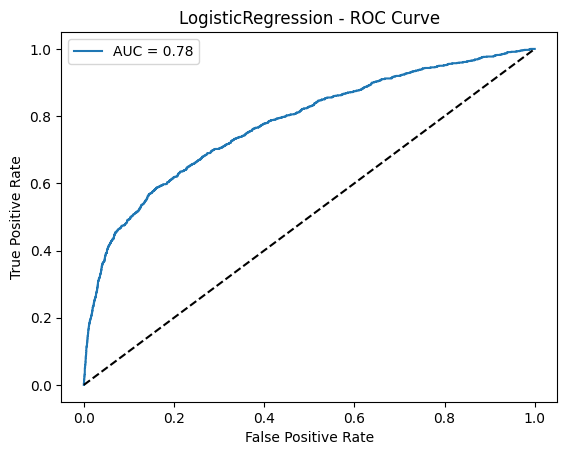

=== DecisionTree Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7985
           1       0.30      0.56      0.39      1058

    accuracy                           0.79      9043
   macro avg       0.62      0.69      0.63      9043
weighted avg       0.86      0.79      0.82      9043



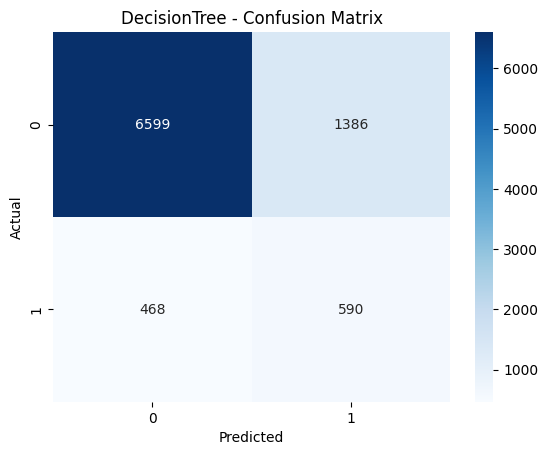

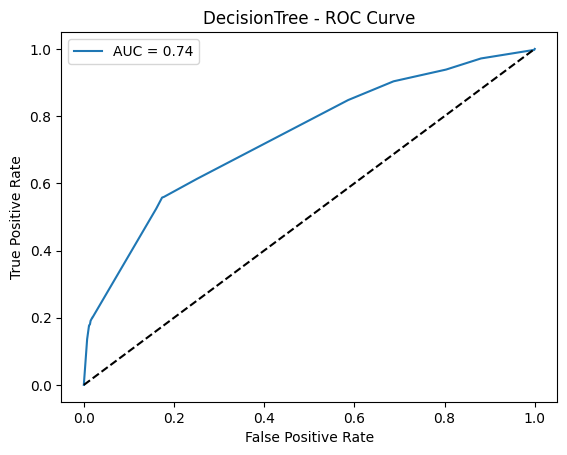

In [7]:
evaluate_model(y_test, y_pred_lr, y_proba_lr, "LogisticRegression")
evaluate_model(y_test, y_pred_dt, y_proba_dt, "DecisionTree")


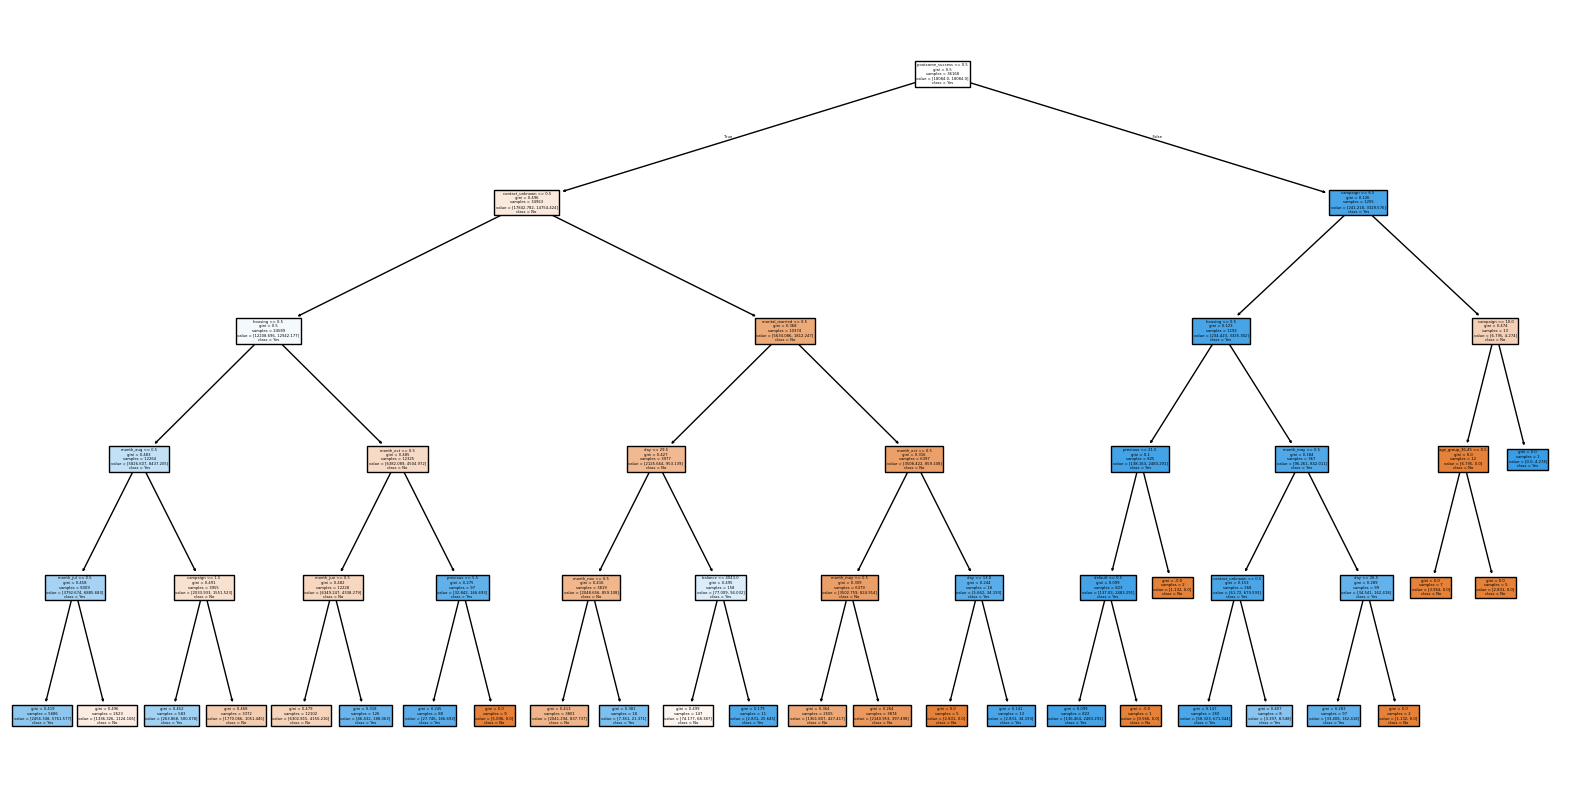

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=["No", "Yes"])
plt.savefig('../results/plots/decision_tree_structure.png')
plt.show()
